<a href="https://colab.research.google.com/github/seemagowda06/SENet/blob/main/SENet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Concatenate, \
     MaxPool2D, GlobalAvgPool2D, Activation

In [ ]:
def fire_block(x, squeeze_filters, expand_filters):
    squeezed = Conv2D(filters=squeeze_filters,
                      kernel_size=1,
                      activation='relu')(x)
    expanded_1x1 = Conv2D(filters=expand_filters,
                        kernel_size=1)(squeezed)
    expanded_3x3 = Conv2D(filters=expand_filters,
                        kernel_size=3,
                        padding='same')(squeezed)
    x = Concatenate()([expanded_1x1, expanded_3x3])
    x = Activation('relu')(x)
    return x

In [ ]:
input = Input([224, 224, 3])
 
x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)

In [ ]:
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=64, expand_filters=256)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=64, expand_filters=256)

In [ ]:
x = Conv2D(filters=1000, kernel_size=1)(x)
x = GlobalAvgPool2D()(x)
 
output = Activation('softmax')(x)
 
from tensorflow.keras import Model
model = Model(input, output)

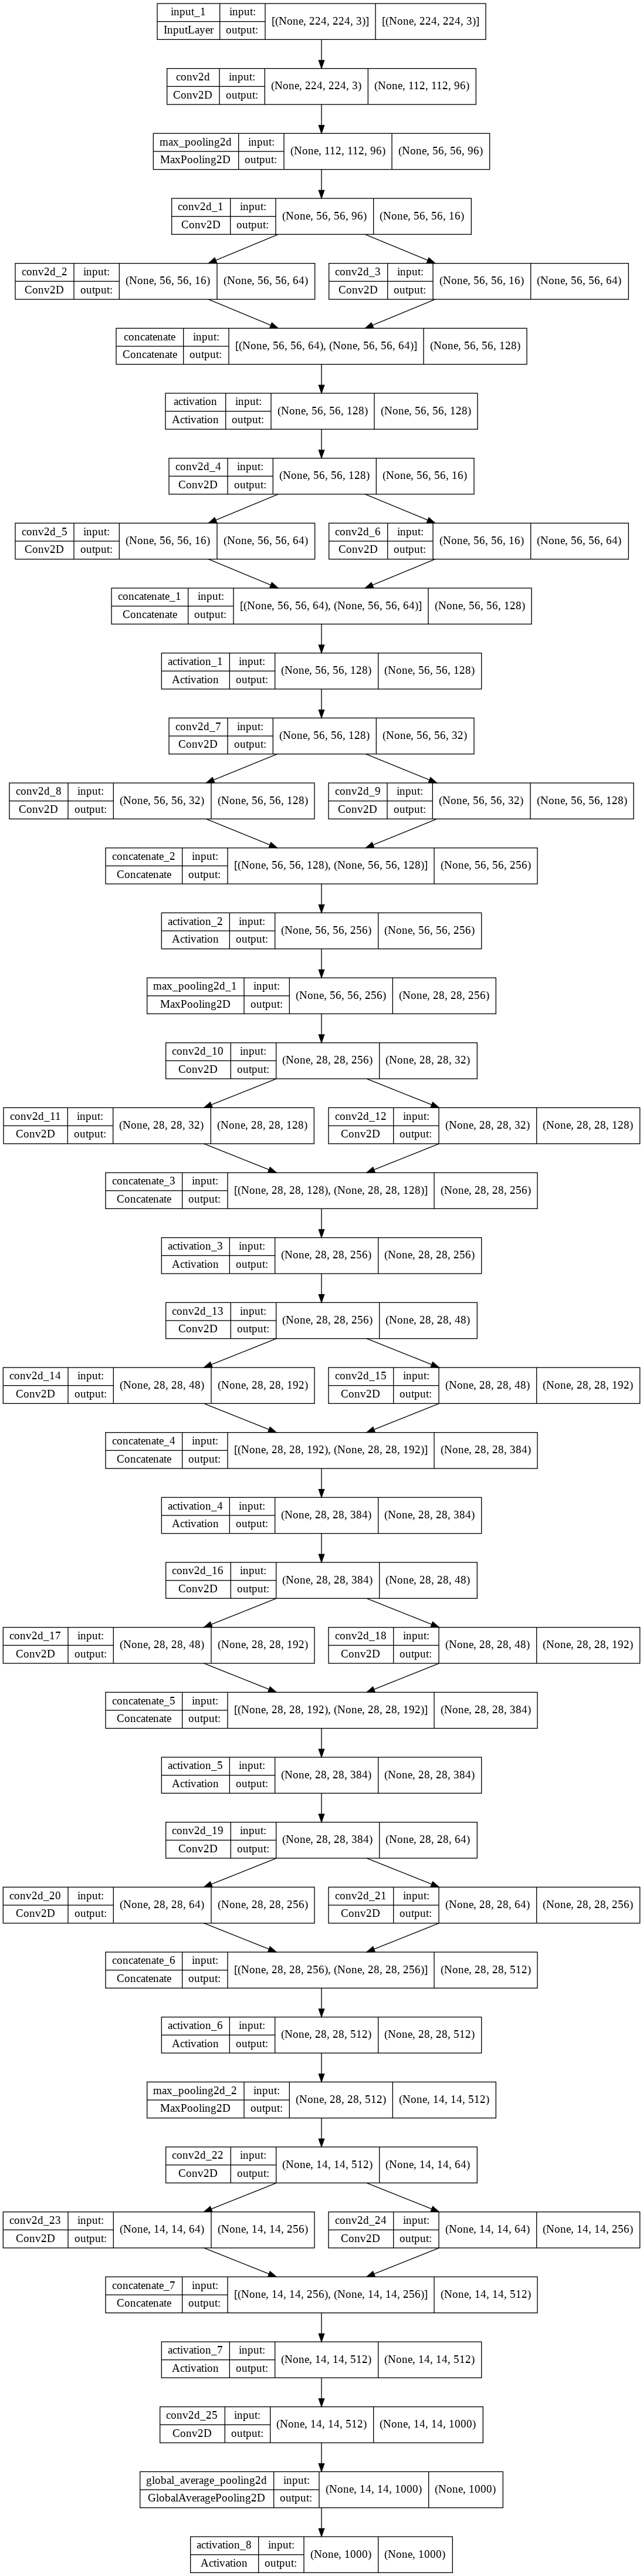

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
import numpy as np
import tensorflow.keras.backend as K
int(np.sum([K.count_params(p) for p in model.trainable_weights]))

1248424

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Concatenate, \
     MaxPool2D, GlobalAvgPool2D, Activation
 
 
def fire_block(x, squeeze_filters, expand_filters):
    squeezed = Conv2D(filters=squeeze_filters,
                      kernel_size=1,
                      activation='relu')(x)
    expanded_1x1 = Conv2D(filters=expand_filters,
                        kernel_size=1,
                        activation='relu')(squeezed)
    expanded_3x3 = Conv2D(filters=expand_filters,
                        kernel_size=3,
                        padding='same',
                        activation='relu')(squeezed)
 
    output = Concatenate()([expanded_1x1, expanded_3x3])
    return output
 
 
input = Input([224, 224, 3])
 
x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)
 
 
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=64, expand_filters=256)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=64, expand_filters=256)
 
 
x = Conv2D(filters=1000, kernel_size=1)(x)
x = GlobalAvgPool2D()(x)
 
output = Activation('softmax')(x)
 
from tensorflow.keras import Model
model = Model(input, output)

print(output)
print(model)

KerasTensor(type_spec=TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None), name='activation_9/Softmax:0', description="created by layer 'activation_9'")
